In [1]:
import pandas as pd
from openpyxl import Workbook
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
wb = Workbook()

In [ ]:
df = pd.read_csv('stockwell_features.csv', index_col=0)
df = pd.read_csv(r'C:\Users\Alailton\Documents\Github\preprocessing\metricas\new_features\fourier_features.csv', index_col=0)
df_type = df['Fault type']
df_w_type = df.drop('Fault type', axis=1)
df_w_type = pd.DataFrame(scaler.fit_transform(df_w_type[df_w_type.columns]), columns=df_w_type.columns)
df = pd.concat([df_w_type, df_type], axis=1)
df.head()

,File ID,Fault resistance,Incidence angle,Fault location,Fault distance,Pen,Feature 0,Feature 1,Feature 2,Feature 3,...,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Fault type
0,-1.723519,-1.355792,-1.224745e+00,-1.549193,-2.36286,-1.307403,-11.120596,0.258891,10.382864,17.501761,...,1.114747,-0.348946,-0.168793,-0.292930,-0.154610,-0.233660,-0.289912,-0.286511,-0.300723,1
1,-1.700424,-1.355792,-3.867705e-16,-1.549193,-2.36286,-1.307403,-2.722478,0.988309,3.037015,1.552654,...,1.112245,-0.351823,-0.158800,-0.234701,-0.154617,-0.233684,-0.291419,-0.297089,-0.305062,1
2,-1.677330,-1.355792,1.224745e+00,-1.549193,-2.36286,-1.307403,-1.093096,1.016270,1.629241,0.382893,...,1.108606,-0.351957,-0.160646,-0.245133,-0.154617,-0.233685,-0.292016,-0.300191,-0.305939,1
3,-1.654235,-1.355792,-1.224745e+00,-1.549193,-2.36286,-1.307403,-0.998554,1.021883,1.546661,0.333118,...,1.108240,-0.351960,-0.160728,-0.245599,-0.154617,-0.233685,-0.292032,-0.300287,-0.305973,2
4,-1.631141,-1.355792,-3.867705e-16,-1.549193,-2.36286,-1.307403,-0.720831,1.036540,1.304759,0.199331,...,1.104625,-0.351938,-0.158748,-0.234407,-0.154618,-0.233684,-0.292191,-0.301699,-0.306439,2


In [7]:
print(f'Fault type: {df['Fault type'].unique()}')
print(f'Fault resistance: {df['Fault resistance'].unique()}')

Fault type: [ 1  2  3  4  5  6  8  9 10 11]
Fault resistance: [-1.35579191e+00 -8.13512027e-01 -1.08466824e-05  8.13490333e-01
  1.35582445e+00]


1 = 'AG';
2 = 'BG';
3 = 'CG';
4 = 'ABG';
5 = 'ACG';
6 = 'BCG';
7 ='ABCG';
8 = 'AB';
9 = 'AC';
10 = 'BC';
11 = 'ABC';

## Separando o dataset de acordo com o tipo de falta

In [8]:
df_mono = df.loc[(df['Fault type'] == 1) | (df['Fault type'] == 2) | (df['Fault type'] == 3)]
df_bi = df.loc[(df['Fault type'] == 8) | (df['Fault type'] == 9) | (df['Fault type'] == 10)]
df_big = df.loc[(df['Fault type'] == 4) | (df['Fault type'] == 5) | (df['Fault type'] == 6)]
df_three = df.loc[(df['Fault type'] == 7) | (df['Fault type'] == 11)]

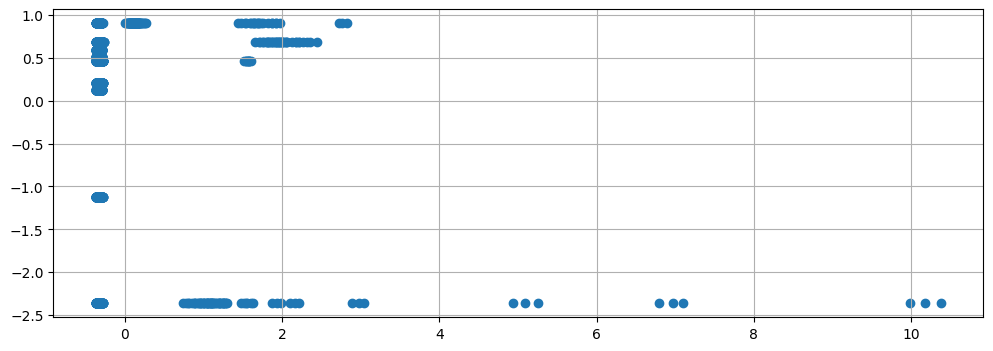

In [16]:
import matplotlib.pyplot as plt

x = df_mono['Feature 2']
y = df_mono['Fault distance']

fig, ax = plt.subplots(figsize=(12, 4))
ax.scatter(x, y)
ax.grid()
plt.show()

## Aplicando as correlações em cada tipo de falta

In [5]:
fault_sets = {'PG': df_mono, 'PP': df_bi, 'PPG': df_big, 'PPP': df_three}

for s in fault_sets:
    print('-----------------------------------------------------------')
    ws = wb.create_sheet(s)
    ws['B1']='Pearson'
    ws['C1']='Kendall'
    ws['D1']='Spearman'
    i=2
    for feature in range(0, len(df.columns)-7):
    
        correlation_feature_pearson = fault_sets[s][f'Feature {feature}'].corr(fault_sets[s]['Fault distance'])
        correlation_feature_kendall = fault_sets[s][f'Feature {feature}'].corr(fault_sets[s]['Fault distance'], method='kendall')
        correlation_feature_spearman = fault_sets[s][f'Feature {feature}'].corr(fault_sets[s]['Fault distance'], method='spearman')

        ws[f'A{i}']=feature
        ws[f'B{i}']=correlation_feature_pearson
        ws[f'C{i}']=correlation_feature_kendall
        ws[f'D{i}']=correlation_feature_kendall

        i+=1
        
        print(f'\33[1mFeature {feature}\33[0m')
        print(f'Correlação de Pearson: {correlation_feature_pearson}')
        print(f'Correlação de Kendall: {correlation_feature_kendall}')
        print(f'Correlação de Spearman: {correlation_feature_spearman}')
        print('\n')

wb.save('wavelet_features_correlation.xlsx')

-----------------------------------------------------------
Feature 0
Correlação de Pearson: -0.042873068119715446
Correlação de Kendall: 0.013267170053444825
Correlação de Spearman: 0.016942640668177668


Feature 1
Correlação de Pearson: 0.11235855260965029
Correlação de Kendall: -0.029832922779001028
Correlação de Spearman: -0.04060502229999726


Feature 2
Correlação de Pearson: -0.015936666826332067
Correlação de Kendall: -0.012289041437739873
Correlação de Spearman: -0.016475188350820787


Feature 3
Correlação de Pearson: 0.11376218916652352
Correlação de Kendall: -0.027124487615149327
Correlação de Spearman: -0.03706404821569154


Feature 4
Correlação de Pearson: -0.02004709799909766
Correlação de Kendall: -0.012289041437739873
Correlação de Spearman: -0.016475188350820787


Feature 5
Correlação de Pearson: -0.03113478978637749
Correlação de Kendall: -0.012173093060802205
Correlação de Spearman: -0.01722420551430491


-----------------------------------------------------------
Fea

In [6]:
df['Fault distance'].describe()

count    4.050000e+03
mean     2.245666e-16
std      1.000123e+00
min     -2.362860e+00
25%      1.259142e-01
50%      4.650836e-01
75%      5.955769e-01
max      9.022291e-01
Name: Fault distance, dtype: float64